In [1]:
from stepmix.stepmix import StepMix
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV, ParameterGrid

import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pkl

In [2]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]
sympdf.shape
# filter to match
sympdf = sympdf.loc[:, (sympdf.sum() / sympdf.shape[0] > 0.05) & (sympdf.sum()  / sympdf.shape[0]< 0.95)]


In [3]:
# convert entries in df['Cognitive_PEM_Severity] with value 0.0 to np.nan
df.loc[df['Cognitive_PEM_Severity'] == 0.0, 'Cognitive_PEM_Severity'] = np.nan
df.loc[df['Physical_PEM_Severity'] == 0.0, 'Physical_PEM_Severity'] = np.nan

In [8]:
df['cluster'] = pd.read_csv("output/cluster_stepmix_aggregate_010524.csv", index_col=0)

In [10]:
# for each cluster plot the fraction of each value of Flag_MECFS
df['Flag_MECFS'] = df['Flag_MECFS'].astype('category')
df['cluster'] = df['cluster'].astype('category')




In [11]:
def plot_flag(compare_var, df, cluscol='cluster', equal_heights=False):
    # Assuming df is your DataFrame
    df[compare_var] = df[compare_var].astype('category')
    df[cluscol] = df[cluscol].astype('category')

    # Create a DataFrame to store the counts
    cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)

    # Normalize counts within each cluster if equal_heights is True
    if equal_heights:
        cluster_counts = cluster_counts.div(cluster_counts.sum(axis=1), axis=0)

    # Plot the stacked bar chart
    sns.set(style="darkgrid")
    plt.figure(figsize=(12, 8))

    # Define the colors for each 'Flag_MECFS' value
    colors = sns.color_palette('husl', n_colors=len(df[compare_var].unique()))

    # Plot the stacked bars
    cluster_counts.plot(kind='bar', stacked=True, color=colors, edgecolor='black')

    # Set plot labels and title
    plt.xlabel('Cluster')
    plt.ylabel('Count' if not equal_heights else 'Fraction')
    plt.title('Stacked Bar Chart of ' + compare_var + ' for each Cluster')

    # Display the legend
    plt.legend(title=compare_var, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the plot
    plt.show()




/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

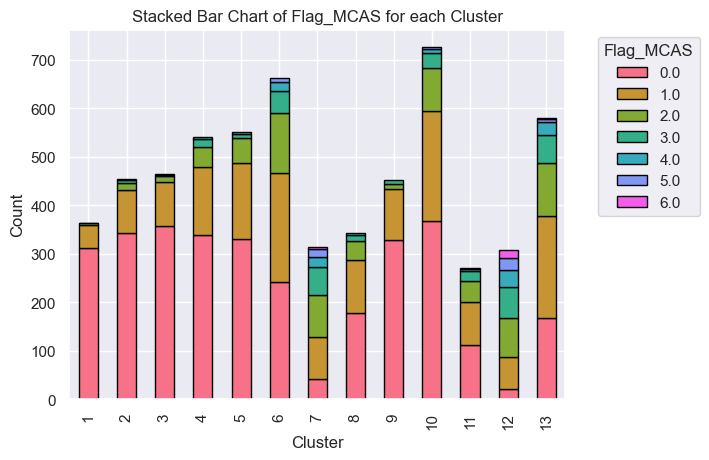

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

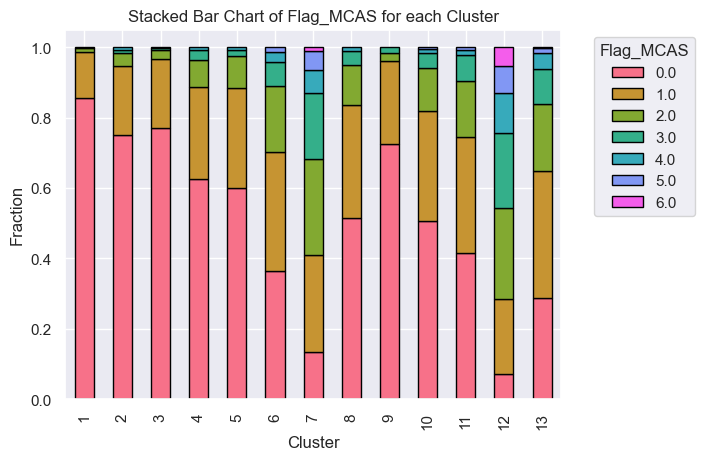

In [12]:
plot_flag("Flag_MCAS", df)
#plot_flag("Flag_MCAS", df, cluscol="cluster_ambig")
plot_flag("Flag_MCAS", df, equal_heights=True)

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

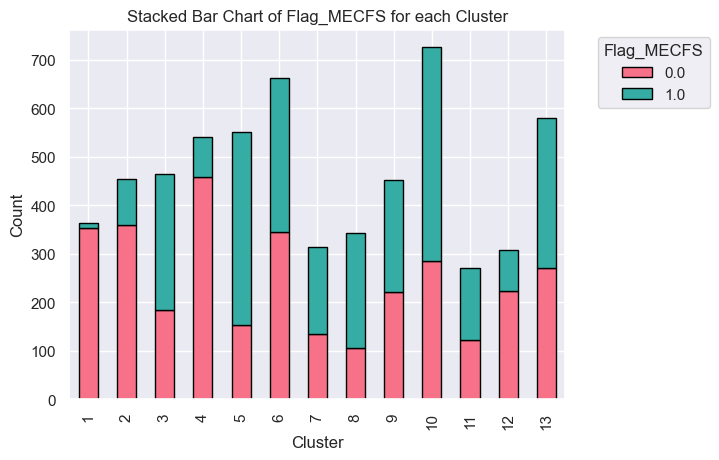

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

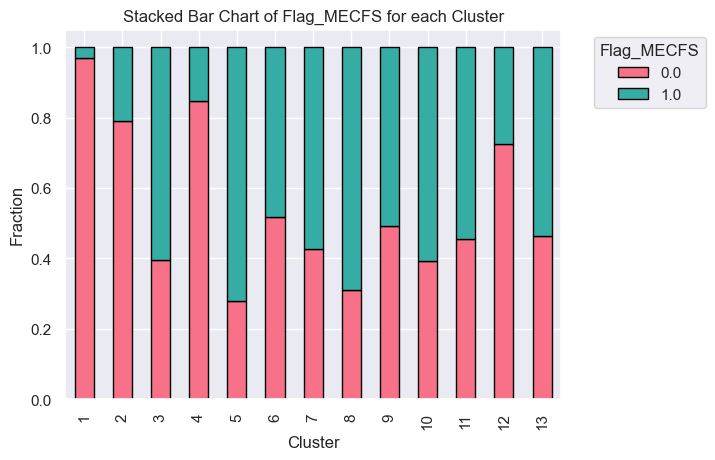

In [13]:
plot_flag("Flag_MECFS", df)
plot_flag("Flag_MECFS", df, equal_heights=True)

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

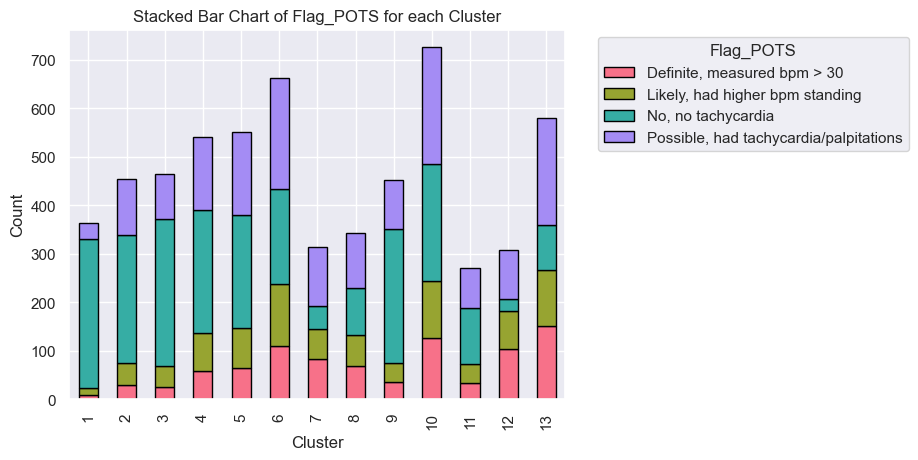

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

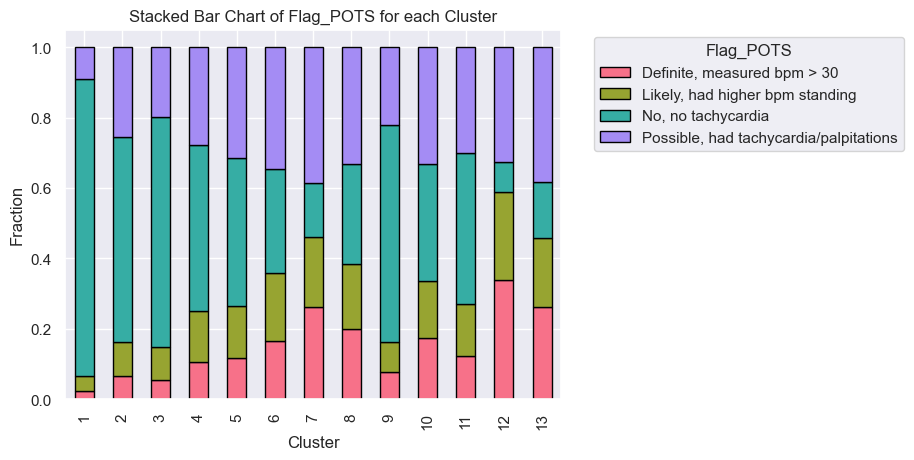

In [14]:
plot_flag("Flag_POTS", df)
plot_flag("Flag_POTS", df, equal_heights=True)

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

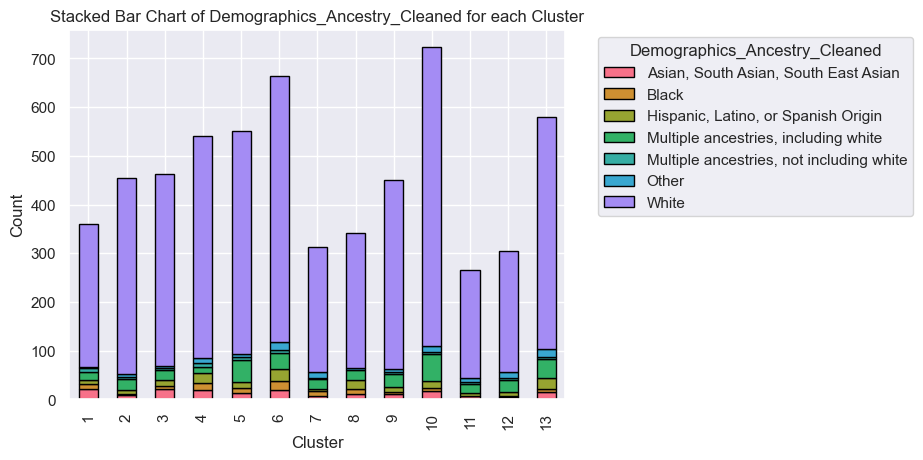

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

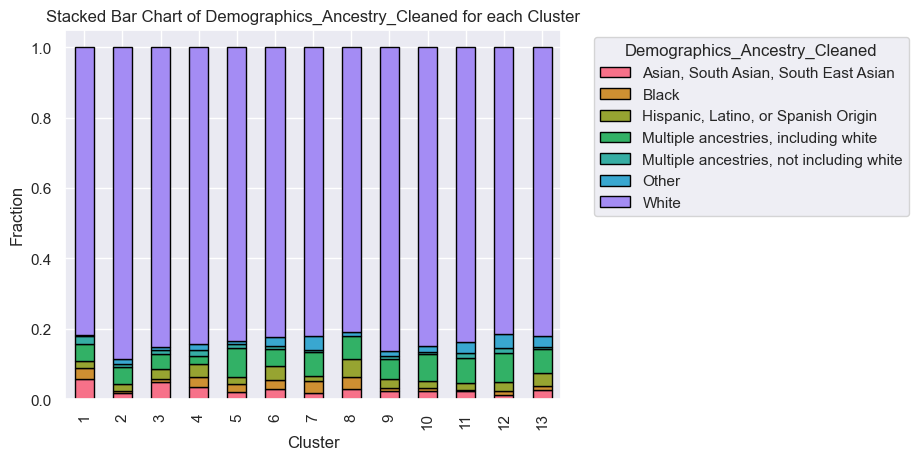

In [15]:
plot_flag("Demographics_Ancestry_Cleaned", df)
plot_flag("Demographics_Ancestry_Cleaned", df, equal_heights=True)

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

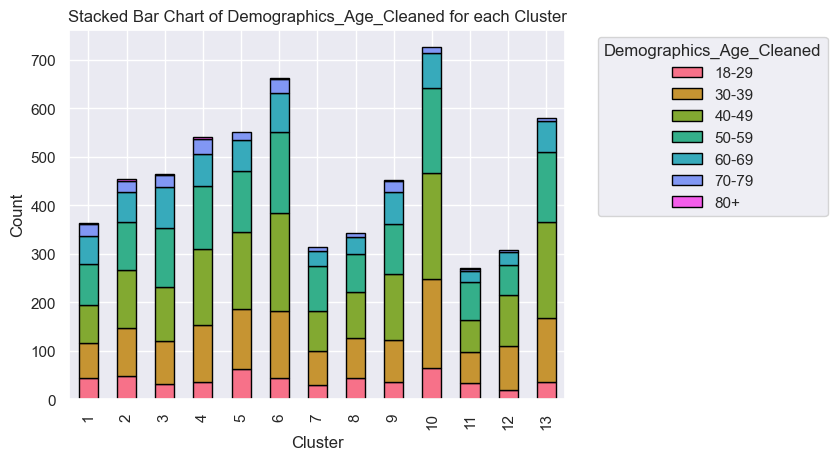

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

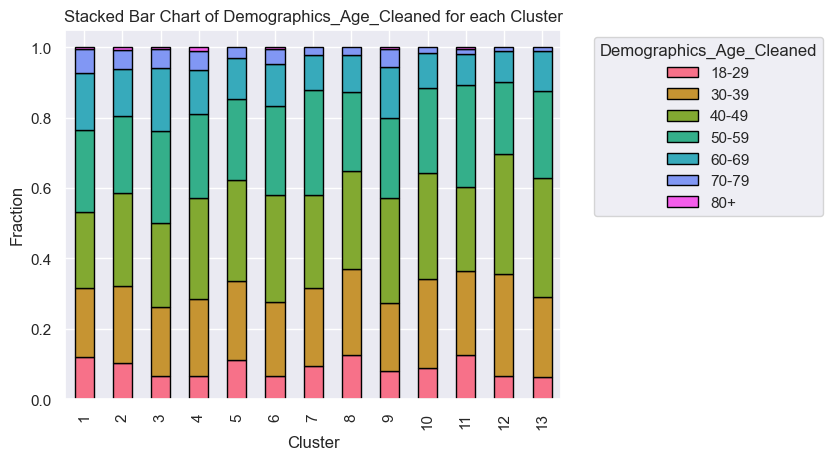

In [16]:
plot_flag("Demographics_Age_Cleaned", df)
plot_flag("Demographics_Age_Cleaned", df, equal_heights=True)

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

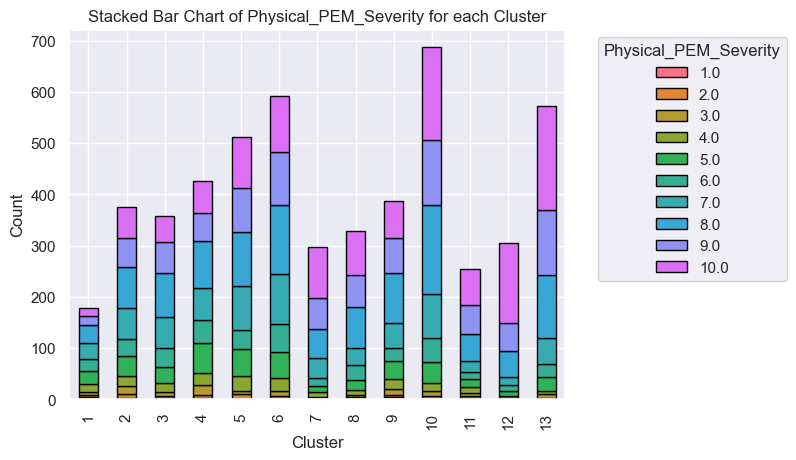

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

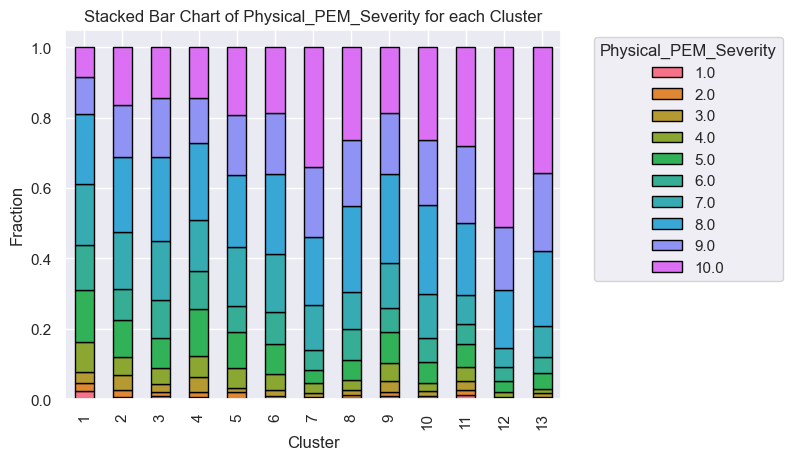

In [17]:
plot_flag("Physical_PEM_Severity", df)
plot_flag("Physical_PEM_Severity", df, equal_heights=True)

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

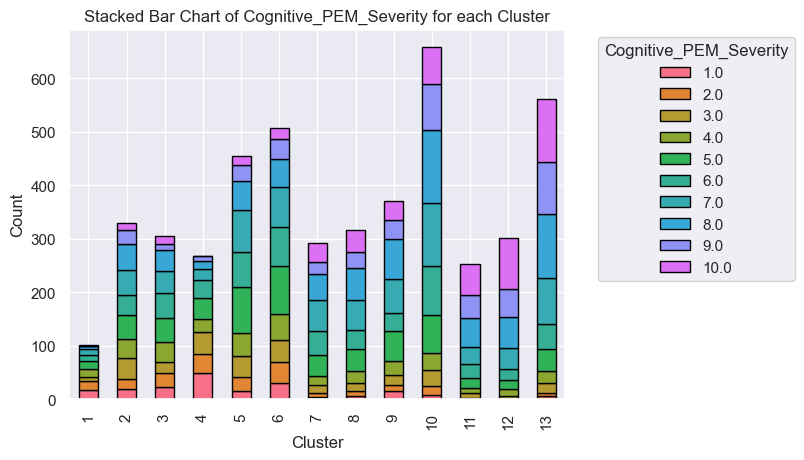

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

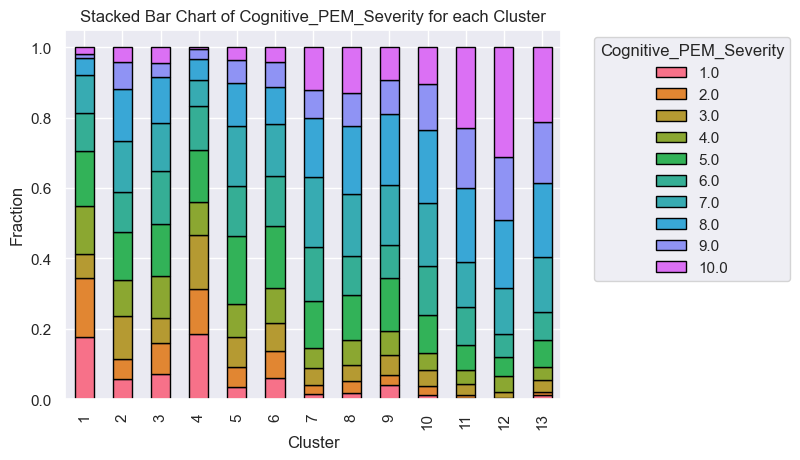

In [18]:
plot_flag("Cognitive_PEM_Severity", df)
plot_flag("Cognitive_PEM_Severity", df, equal_heights=True)

In [19]:
df_mod = df.copy()
# convert the column HasPeriods to non-categorical
df_mod['HasPeriods'] = df_mod['HasPeriods'].astype('str')

# replace nans in column HasPeriods of df_mod with "NA"
df_mod['HasPeriods'] = df_mod['HasPeriods'].fillna("NA")

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

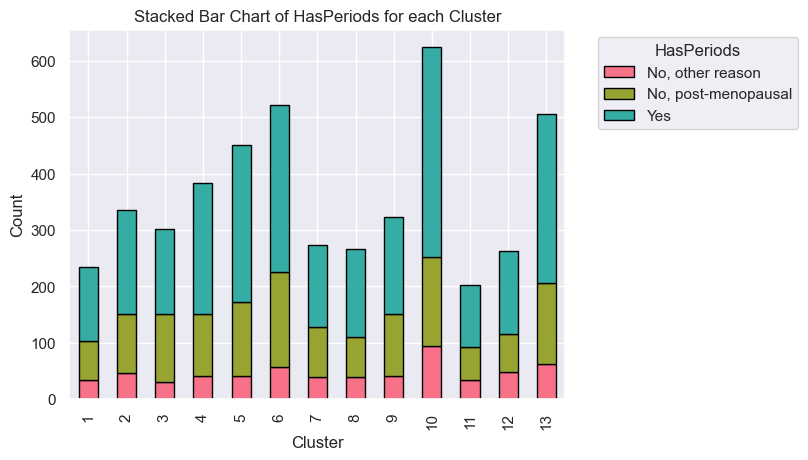

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

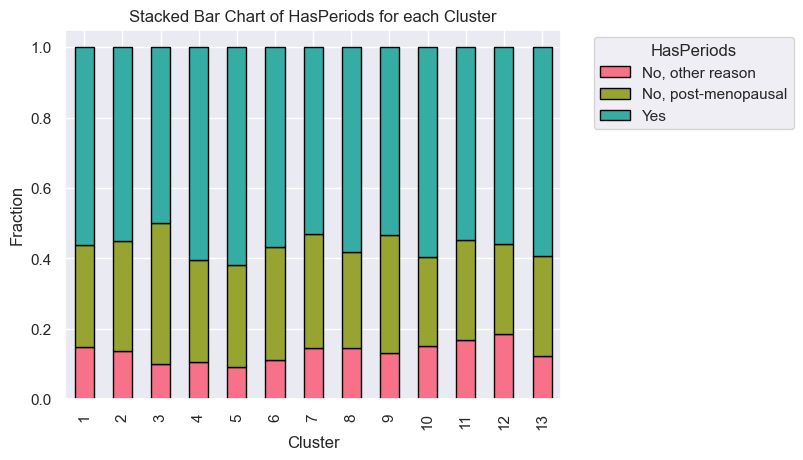

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

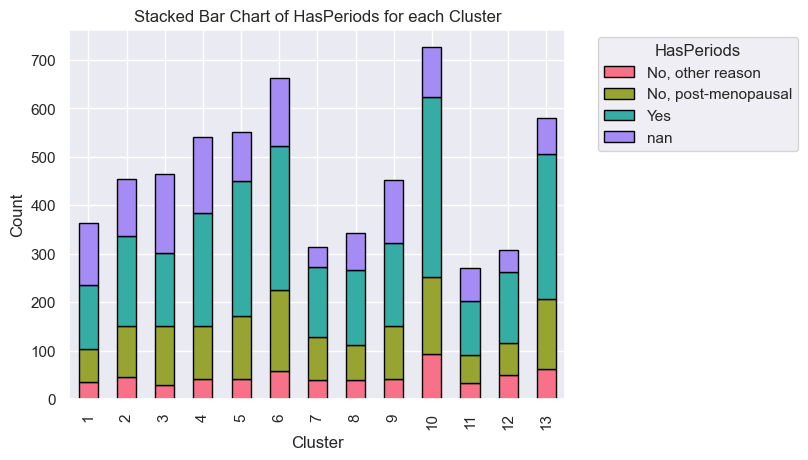

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

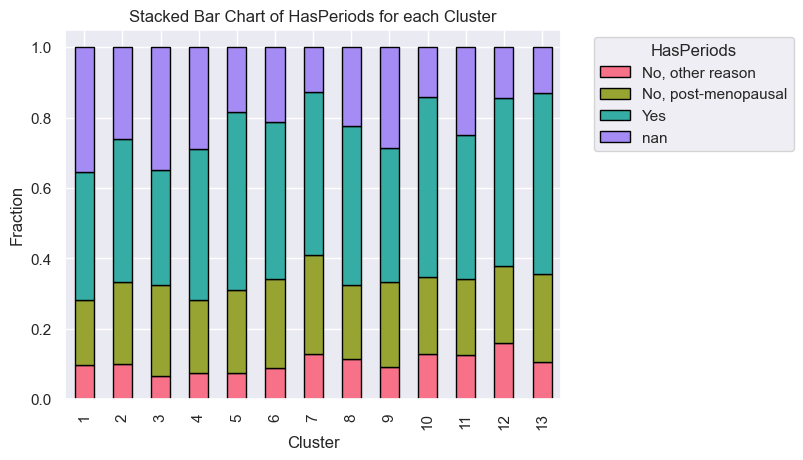

In [20]:
plot_flag("HasPeriods", df)
plot_flag("HasPeriods", df, equal_heights=True)

plot_flag("HasPeriods", df_mod)
plot_flag("HasPeriods", df_mod, equal_heights=True)

In [21]:
# for each entry in cluster, calculate the average value of each other column
# convert to not categorical
df['Cognitive_PEM_Severity'] = df['Cognitive_PEM_Severity'].astype(float)  # Convert to float or appropriate numeric type

df['Physical_PEM_Severity'] = df['Physical_PEM_Severity'].astype(float)  # Convert to float or appropriate numeric type



In [22]:
print(df.groupby('cluster')['Cognitive_PEM_Severity'].mean().sort_values())
print(df.groupby('cluster')['Cognitive_PEM_Severity'].std())


cluster
4     4.063433
1     4.127451
3     5.386885
6     5.514793
2     5.615152
5     5.720264
9     6.462162
7     6.689420
8     6.731861
10    6.901216
13    7.596085
11    7.682540
12    8.093023
Name: Cognitive_PEM_Severity, dtype: float64
cluster
1     2.378416
2     2.443355
3     2.421360
4     2.346343
5     2.206489
6     2.385165
7     2.157130
8     2.271318
9     2.352402
10    2.114881
11    2.028289
12    1.893318
13    2.090344
Name: Cognitive_PEM_Severity, dtype: float64


/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/2214597471.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('cluster')['Cognitive_PEM_Severity'].mean().sort_values())
/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/2214597471.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('cluster')['Cognitive_PEM_Severity'].std())


In [23]:
print(df.groupby('cluster')['Physical_PEM_Severity'].mean().sort_values())
print(df.groupby('cluster')['Physical_PEM_Severity'].std())



cluster
1     6.606742
4     7.070588
2     7.239362
3     7.389356
9     7.523316
5     7.526419
6     7.619932
11    7.933071
8     8.000000
10    8.052402
7     8.315436
13    8.471204
12    8.881967
Name: Physical_PEM_Severity, dtype: float64
cluster
1     2.153006
2     2.146909
3     1.968059
4     2.119030
5     2.007532
6     1.894638
7     1.769884
8     1.877336
9     2.092839
10    1.799787
11    2.150340
12    1.538701
13    1.692628
Name: Physical_PEM_Severity, dtype: float64


/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/1331021585.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('cluster')['Physical_PEM_Severity'].mean().sort_values())
/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/1331021585.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('cluster')['Physical_PEM_Severity'].std())


In [24]:
"""
# Assuming df is your DataFrame
df['Cognitive_PEM_Severity'] = df['Cognitive_PEM_Severity'].astype(float)  # Convert to float or appropriate numeric type

# Create separate histograms for each cluster
clusters = df['cluster'].unique()

fig, axes = plt.subplots(nrows=len(clusters), figsize=(8, 6 * len(clusters)))

for i, cluster in enumerate(clusters):
    data_for_cluster = df[df['cluster'] == cluster]['Cognitive_PEM_Severity']
    axes[i].hist(data_for_cluster, bins=20, alpha=0.5)
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('Cognitive_PEM_Severity')
    axes[i].set_ylabel('Frequency')

#plt.tight_layout()
#plt.show()
"""


"\n# Assuming df is your DataFrame\ndf['Cognitive_PEM_Severity'] = df['Cognitive_PEM_Severity'].astype(float)  # Convert to float or appropriate numeric type\n\n# Create separate histograms for each cluster\nclusters = df['cluster'].unique()\n\nfig, axes = plt.subplots(nrows=len(clusters), figsize=(8, 6 * len(clusters)))\n\nfor i, cluster in enumerate(clusters):\n    data_for_cluster = df[df['cluster'] == cluster]['Cognitive_PEM_Severity']\n    axes[i].hist(data_for_cluster, bins=20, alpha=0.5)\n    axes[i].set_title(f'Cluster {cluster}')\n    axes[i].set_xlabel('Cognitive_PEM_Severity')\n    axes[i].set_ylabel('Frequency')\n\n#plt.tight_layout()\n#plt.show()\n"

In [25]:
df['Flag_MECFS'] = df['Flag_MECFS'].astype(float)  # Convert to float or appropriate numeric type
#df['Flag_POTS'] = df['Flag_POTS'].astype(float)  # Convert to float or appropriate numeric type



df['Flag_MCAS'] = df['Flag_MCAS'].astype(float)  # Convert to float or appropriate numeric type


In [26]:
df['Flag_MECFS'].mean()

0.46675509865693915

In [27]:
df['Flag_MECFS'].groupby(df['cluster']).mean().sort_values()

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/2001860398.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Flag_MECFS'].groupby(df['cluster']).mean().sort_values()


cluster
1     0.030220
4     0.153420
2     0.208791
12    0.273616
6     0.481146
9     0.508850
13    0.535284
11    0.544444
7     0.571885
3     0.603448
10    0.607438
8     0.690962
5     0.721014
Name: Flag_MECFS, dtype: float64

In [28]:
df['Flag_POTS_numeric'] = df['Flag_POTS'].replace({'Definite, measured bpm > 30': 3, 'Likely, had higher bpm standing': 2,
                                                   'Possible, had tachycardia/palpitations': 1, 'No, no tachycardia': 0})

df['Flag_POTS_numeric'] = df['Flag_POTS_numeric'].astype(float)  # Convert to float or appropriate numeric type


In [29]:
df['Flag_POTS_numeric'].groupby(df['cluster']).mean().sort_values()

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/3571487350.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Flag_POTS_numeric'].groupby(df['cluster']).mean().sort_values()


cluster
1     0.247253
3     0.551724
9     0.626106
2     0.646154
4     0.889094
5     0.958333
11    0.962963
10    1.176309
6     1.226244
8     1.300292
13    1.559380
7     1.568690
12    1.843648
Name: Flag_POTS_numeric, dtype: float64

In [47]:
df['Flag_POTS_numeric_norm']= df['Flag_POTS_numeric']/3

In [48]:
df['Flag_POTS_numeric_norm'].groupby(df['cluster']).mean().sort_values()

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/900521298.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Flag_POTS_numeric_norm'].groupby(df['cluster']).mean().sort_values()


cluster
1     0.082418
3     0.183908
9     0.208702
2     0.215385
4     0.296365
5     0.319444
11    0.320988
10    0.392103
6     0.408748
8     0.433431
13    0.519793
7     0.522897
12    0.614549
Name: Flag_POTS_numeric_norm, dtype: float64

In [30]:
df['Flag_MCAS'].groupby(df['cluster']).mean().sort_values()

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/1696163148.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Flag_MCAS'].groupby(df['cluster']).mean().sort_values()


cluster
1     0.159341
3     0.273707
2     0.325275
9     0.331858
4     0.532348
5     0.550725
8     0.708455
10    0.754821
11    0.966667
6     1.096531
13    1.306368
7     1.977636
12    2.527687
Name: Flag_MCAS, dtype: float64

In [49]:
df['Flag_MCAS_norm'] = df['Flag_MCAS']/df['Flag_MCAS'].max()

In [51]:
df['Flag_MCAS_norm'].groupby(df['cluster']).mean()

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/3760199024.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Flag_MCAS_norm'].groupby(df['cluster']).mean()


cluster
1     0.026557
2     0.054212
3     0.045618
4     0.088725
5     0.091787
6     0.182755
7     0.329606
8     0.118076
9     0.055310
10    0.125803
11    0.161111
12    0.421281
13    0.217728
Name: Flag_MCAS_norm, dtype: float64

Text(0.5, 1.0, 'Physical_PEM_Severity in Cluster 5')

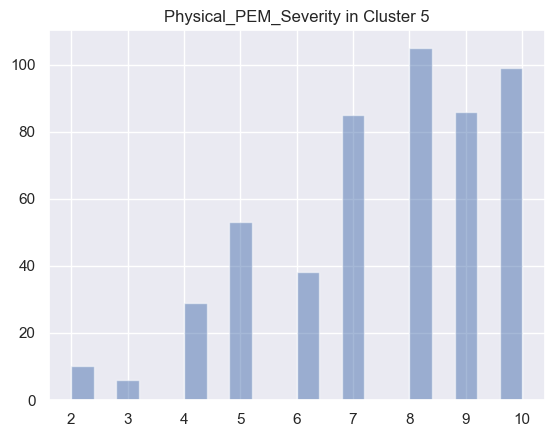

In [31]:
df['Physical_PEM_Severity'] = df['Physical_PEM_Severity'].astype(float)  # Convert to float or appropriate numeric type

# Create separate histograms for each cluster
cluster = 5

data_for_cluster = df[df['cluster'] == cluster]
plt.hist(data_for_cluster['Physical_PEM_Severity'], bins=20, alpha=0.5)
plt.title(f'Physical_PEM_Severity in Cluster {cluster}')


Text(0.5, 1.0, 'Cognitive_PEM_Severity in Cluster 5')

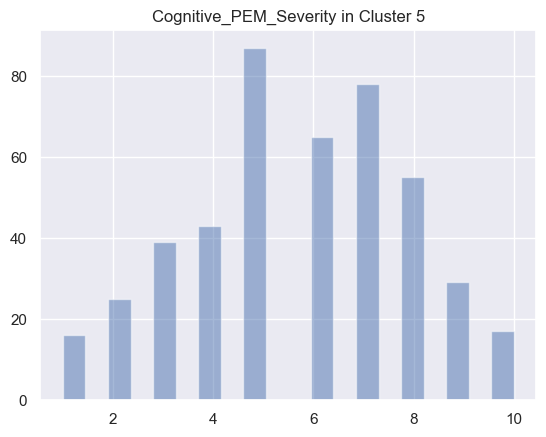

In [32]:

plt.hist(data_for_cluster['Cognitive_PEM_Severity'], bins=20, alpha=0.5)
plt.title(f'Cognitive_PEM_Severity in Cluster {cluster}')


In [33]:
#extract patients from cluster 1
df_clus1 = df[df['cluster'] == 1]

In [34]:
df_clus1.isna().sum().sort_values(ascending=False).head(15)

Cognitive_PEM_Severity           262
Physical_PEM_Severity            186
HasPeriods                       129
Demographics_Ancestry_Cleaned      5
Demographics_Gender_Cleaned        3
Symptom_Memory_short               0
Symptom_Inability_to_yawn          0
Symptom_Covid_toes                 0
Symptom_Dermatographia             0
Symptom_Skin_rashes                0
Symptom_Skin_Allergy_other         0
Symptom_Muscle_spasms              0
Symptom_Muscle_aches               0
Symptom_Joint_pain                 0
Symptom_Bone_ache_burning          0
dtype: int64

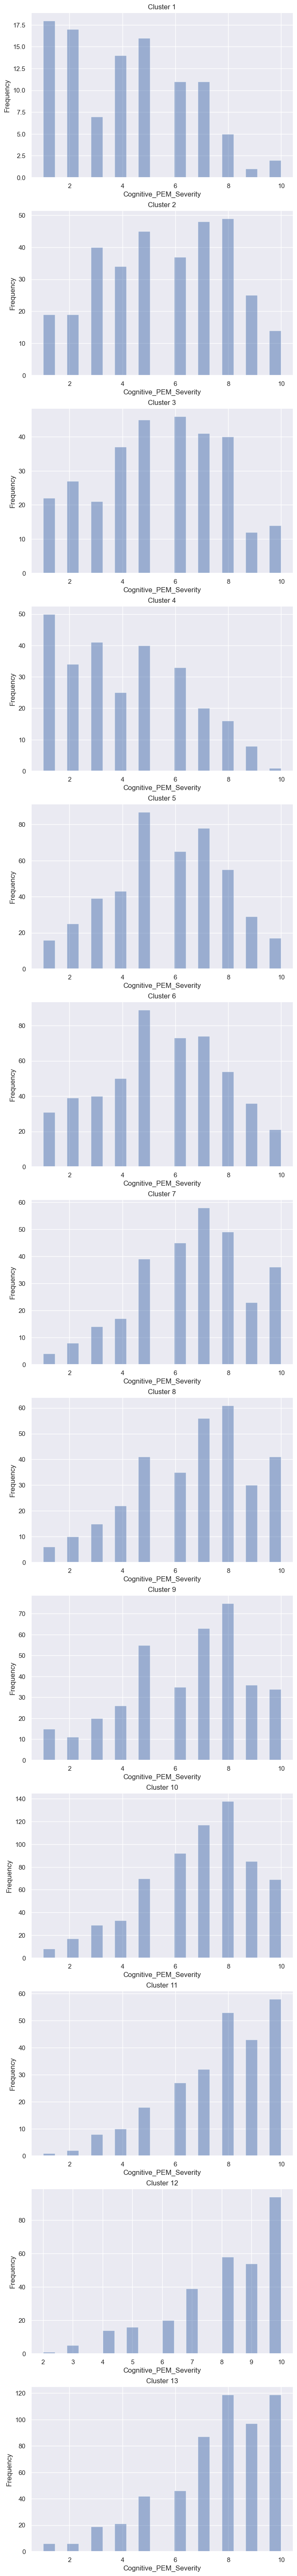

In [35]:
df['Cognitive_PEM_Severity'] = df['Cognitive_PEM_Severity'].astype(float)  # Convert to float or appropriate numeric type

# Create separate histograms for each cluster
clusters = df['cluster'].unique().sort_values()

fig, axes = plt.subplots(nrows=len(clusters), figsize=(8, 6 * len(clusters)))

for i, cluster in enumerate(clusters):
    data_for_cluster = df[df['cluster'] == cluster]['Cognitive_PEM_Severity']
    axes[i].hist(data_for_cluster, bins=20, alpha=0.5)
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('Cognitive_PEM_Severity')
    axes[i].set_ylabel('Frequency')

#plt.tight_layout()
#plt.show()

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/641831819.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.hist("Cognitive_PEM_Severity", by="cluster", bins=20, figsize=(12, 8))


array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>,
        <Axes: title={'center': '11'}>, <Axes: title={'center': '12'}>],
       [<Axes: title={'center': '13'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

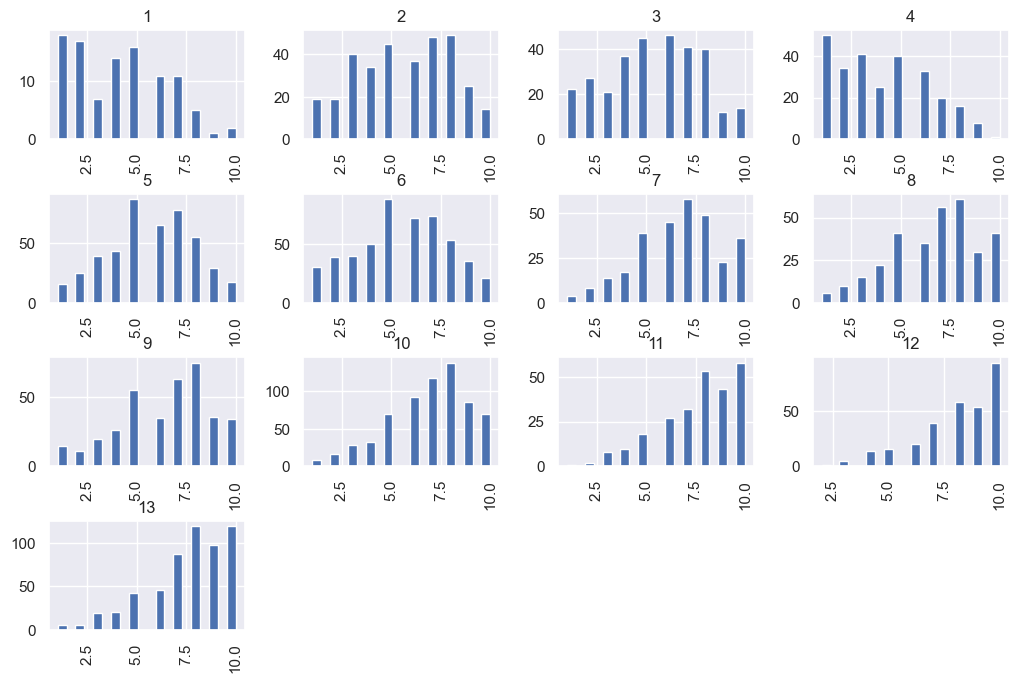

In [36]:
df.hist("Cognitive_PEM_Severity", by="cluster", bins=20, figsize=(12, 8))

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/792100908.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.hist("Physical_PEM_Severity", by="cluster", bins=20, figsize=(12, 8))


array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>,
        <Axes: title={'center': '11'}>, <Axes: title={'center': '12'}>],
       [<Axes: title={'center': '13'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

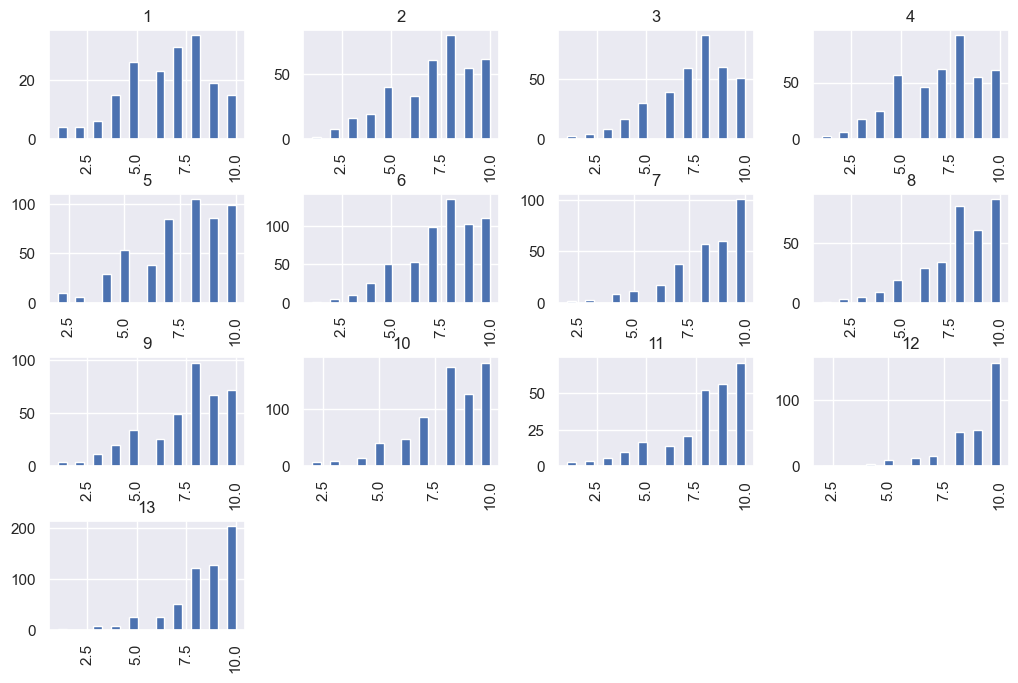

In [37]:
df.hist("Physical_PEM_Severity", by="cluster", bins=20, figsize=(12, 8))

array([[<Axes: title={'center': 'Physical_PEM_Severity'}>]], dtype=object)

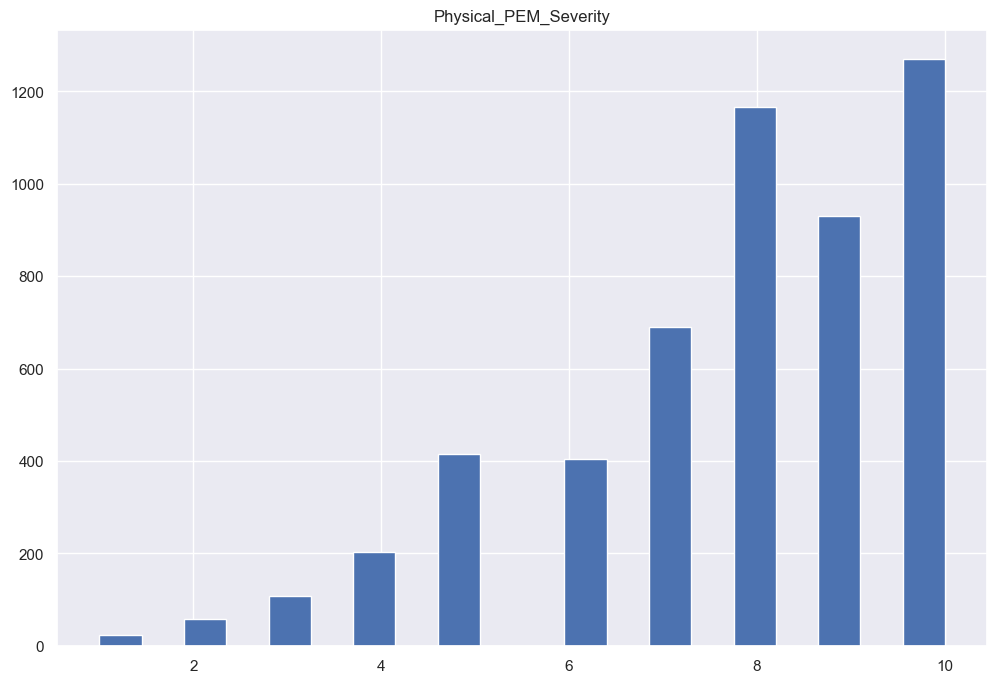

In [38]:
df.hist("Physical_PEM_Severity", bins=20, figsize=(12, 8))

In [39]:
df['Cognitive_PEM_Severity'].value_counts()

Cognitive_PEM_Severity
8.0     772
7.0     724
5.0     603
6.0     565
10.0    520
9.0     479
4.0     346
3.0     298
2.0     216
1.0     196
Name: count, dtype: int64

In [40]:
# check what fraction of patients in each cluster have NaN for HasPeriods
df['HasPeriods'] = df['HasPeriods'].astype('str')
df.groupby('cluster')['HasPeriods'].value_counts(normalize=True)
# from this groupby print just the values for 'nan'
df.groupby('cluster')['HasPeriods'].value_counts(normalize=True).loc[:, 'nan'].sort_values()


/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/2939411116.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('cluster')['HasPeriods'].value_counts(normalize=True)
/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/2939411116.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('cluster')['HasPeriods'].value_counts(normalize=True).loc[:, 'nan'].sort_values()


cluster
7     0.127796
13    0.130809
10    0.140496
12    0.143322
5     0.182971
6     0.212670
8     0.224490
11    0.248148
2     0.261538
9     0.285398
4     0.290203
3     0.349138
1     0.354396
Name: proportion, dtype: float64

In [41]:
x = df.groupby('cluster')['HasPeriods'].value_counts(normalize=True).loc[:, 'No, other reason']/(df.groupby('cluster')['HasPeriods'].value_counts(normalize=True).loc[:, 'No, other reason'] + df.groupby('cluster')['HasPeriods'].value_counts(normalize=True).loc[:, 'Yes'])

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/4126206074.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = df.groupby('cluster')['HasPeriods'].value_counts(normalize=True).loc[:, 'No, other reason']/(df.groupby('cluster')['HasPeriods'].value_counts(normalize=True).loc[:, 'No, other reason'] + df.groupby('cluster')['HasPeriods'].value_counts(normalize=True).loc[:, 'Yes'])
/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16758/4126206074.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = df.groupby('cluster')['HasPeriods'].value_counts(normalize=True).loc[:, 'No, other re

In [42]:
x.sort_values()

cluster
5     0.128125
4     0.150183
6     0.163842
3     0.165746
13    0.171745
9     0.196262
2     0.199134
8     0.201031
10    0.202151
1     0.209581
7     0.216216
11    0.234483
12    0.250000
Name: proportion, dtype: float64

In [46]:
from sklearn.metrics import adjusted_rand_score as ari 
ari(df['cluster'], df['cluster_old'])



0.5531873434925982

In [52]:
clus_info = pd.DataFrame(index = range(12))

In [53]:
clus_info['size']

""
0
1
2
3
4
5
6
7
8
9
